# bank  marketing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
# from teaching_tools.widgets import ConfusionMatrixWidget





In [2]:
data = pd.read_csv("C:\\Users\\USER\OneDrive\\Desktop\\datasets\\bank.csv", sep=";")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data["default"].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [5]:
data["y"].head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [6]:
data.drop(columns = ["contact","day","month","duration"],inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,1,-1,0,unknown,no


In [7]:
data.drop(columns = "poutcome",inplace=True)


In [8]:
data["y"] = data["y"].map({"yes": True, "no": False})
data.head()

,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,1,-1,0,False
1,44,technician,single,secondary,no,29,yes,no,1,-1,0,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,-1,0,False
3,47,blue-collar,married,unknown,no,1506,yes,no,1,-1,0,False
4,33,unknown,single,unknown,no,1,no,no,1,-1,0,False


In [9]:
data["y"].head()


0    False
1    False
2    False
3    False
4    False
Name: y, dtype: bool

In [10]:
y_plot=data["y"].value_counts(normalize = True)

<Axes: xlabel='y'>

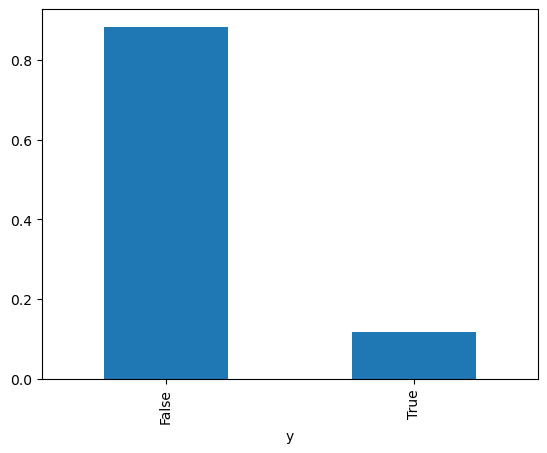

In [11]:
y_plot.plot(kind = "bar")

In [12]:
X = data.drop(columns="y")
y = data["y"]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_train:", y_test.shape)

X_train: (36168, 11)
X_test: (9043, 11)
y_train: (36168,)
y_train: (9043,)


In [14]:
Over = RandomOverSampler(random_state =42)
X_train_over, y_train_over = Over.fit_resample(X_train,y_train)
print(X_train_over.shape)
print(y_train_over.shape)

(63940, 11)
(63940,)


In [15]:
baseline = y_train.value_counts(normalize = True).max()

In [16]:
round(baseline,2)

0.88

In [35]:
clf = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),  # -1 or any other value as placeholder for unseen categories
    RandomForestClassifier(random_state=42)
)
print(clf)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [36]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5,n_jobs=-1) 
cv_acc_scores


array([0.96715671, 0.97059744, 0.9673913 , 0.96903347, 0.96926806])

In [37]:
params = {
    "randomforestclassifier__n_estimators" : range(25,100,25),
    "randomforestclassifier__max_depth" : range(10,50,10)
}
params

{'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [38]:
model = GridSearchCV(
    clf,
    param_grid = params,
    cv=5,
    n_jobs=-1,
    verbose = 1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(handle_unknown='use_encoded_value',
                                                       unknown_value=-1)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [39]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(handle_unknown='use_encoded_value',
                                                       unknown_value=-1)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [40]:
model.cv_results_

{'mean_fit_time': array([16.57421618, 20.9171741 , 27.49951162, 24.31156063, 47.89365935,
        63.15900736, 23.45046039, 41.35278888, 72.05247331, 28.62523985,
        44.87479911, 39.97132368]),
 'std_fit_time': array([0.38788941, 8.1008621 , 7.98963842, 1.11708584, 2.64533402,
        1.97530703, 4.15628429, 4.13121527, 2.62566262, 1.67216465,
        3.16074651, 7.98747064]),
 'mean_score_time': array([1.08933263, 0.56373386, 1.49581752, 1.39953341, 2.39208202,
        4.17742381, 1.61645808, 1.56424074, 3.85924544, 1.62924886,
        2.70782151, 1.12656269]),
 'std_score_time': array([0.12076995, 0.38667133, 0.38518691, 0.16420275, 0.54975209,
        0.65150741, 0.35508662, 0.93471499, 1.20953228, 0.4393039 ,
        1.04594656, 0.54313816]),
 'param_randomforestclassifier__max_depth': masked_array(data=[10, 10, 10, 20, 20, 20, 30, 30, 30, 40, 40, 40],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
 

In [41]:
results = pd.DataFrame(model.cv_results_)

In [42]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,16.574216,0.387889,1.089333,0.120770,10,25,"{'randomforestclassifier__max_depth': 10, 'ran...",0.736315,0.738583,0.740694,0.737488,0.743040,0.739224,0.002392,12
1,20.917174,8.100862,0.563734,0.386671,10,50,"{'randomforestclassifier__max_depth': 10, 'ran...",0.738427,0.739600,0.745621,0.742102,0.746168,0.742383,0.003108,10
2,27.499512,7.989638,1.495818,0.385187,10,75,"{'randomforestclassifier__max_depth': 10, 'ran...",0.737801,0.739365,0.745855,0.741555,0.745230,0.741961,0.003164,11
3,24.311561,1.117086,1.399533,0.164203,20,25,"{'randomforestclassifier__max_depth': 20, 'ran...",0.941664,0.946121,0.944088,0.949797,0.949797,0.946293,0.003190,9
4,47.893659,2.645334,2.392082,0.549752,20,50,"{'randomforestclassifier__max_depth': 20, 'ran...",0.946747,0.951048,0.946747,0.951830,0.949249,0.949124,0.002114,8
5,63.159007,1.975307,4.177424,0.651507,20,75,"{'randomforestclassifier__max_depth': 20, 'ran...",0.948467,0.951752,0.949562,0.951986,0.950813,0.950516,0.001333,7
6,23.450460,4.156284,1.616458,0.355087,30,25,"{'randomforestclassifier__max_depth': 30, 'ran...",0.961370,0.967313,0.964342,0.966375,0.965436,0.964967,0.002051,6
7,41.352789,4.131215,1.564241,0.934715,30,50,"{'randomforestclassifier__max_depth': 30, 'ran...",0.965906,0.970676,0.967079,0.969503,0.969346,0.968502,0.001744,2
8,72.052473,2.625663,3.859245,1.209532,30,75,"{'randomforestclassifier__max_depth': 30, 'ran...",0.965358,0.970285,0.966140,0.969268,0.968721,0.967954,0.001885,4
9,28.625240,1.672165,1.629249,0.439304,40,25,"{'randomforestclassifier__max_depth': 40, 'ran...",0.962934,0.966844,0.964576,0.965671,0.966609,0.965327,0.001439,5


In [43]:
model.predict(X_train_over)

array([False, False, False, ...,  True,  True,  True])

In [44]:
acc_train =model.score(X_train,y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9987
Test Accuracy: 0.8653


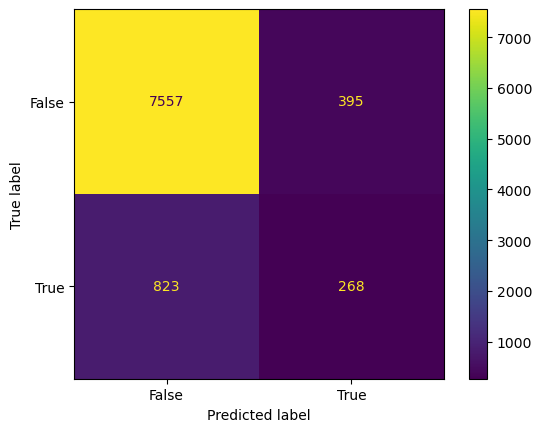

In [49]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [56]:
feature = X_train_over.columns
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_

feat_imp= pd.Series(importances, index = feature).sort_values()
feat_imp.tail(10)

loan         0.017891
marital      0.030055
previous     0.037832
housing      0.038403
education    0.041359
campaign     0.087330
pdays        0.090118
job          0.090755
age          0.231838
balance      0.330318
dtype: float64

<Axes: >

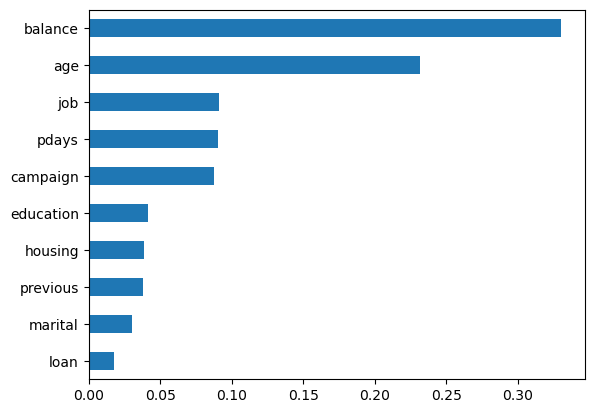

In [57]:
feat_imp.tail(10).plot(kind = "barh")

In [ ]:
c = ConfusionMatrixWidget(model, X_test, y_test)
c.show()

In [60]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.90      0.95      0.93      7952
        True       0.40      0.25      0.31      1091

    accuracy                           0.87      9043
   macro avg       0.65      0.60      0.62      9043
weighted avg       0.84      0.87      0.85      9043

